# DIABETES PREDICTION USING MACHINE LEARNING

# WHAT IS DIABETES 

Diabetes is a chronic disease that occurs when the pancrease is no longer able to make insulin, or when the body cannot make good use of the insulin it produces. Symptoms of high blood sugar include frequent urination, increased thirst and increase hunger. Untreated high blood sugar from diabetes can damage your nerves, eyes, kidneys and other organs.

# Types of  diabetes:

- Type 1 diabetes is an autoimmune disease. The immune system attacks and distroys cells in the pancrease, where insulin is made.
- Type 2 diabetes occurs when your body becomes resistant to insulin and sugar builds up in your blood.
- Prediabetes occurs when your blood sugar is higher than normal, but its not high enough for a diagnosis of type 2 diabetes.
- Gestational diabetes is high blood sugar during pregnancy. Insulin blocking hormones produced by the placenta cause this type of diabetes.

# OBJECTIVE
The objective of the project is to build a machine learning model to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measures included in the dataset.

# ABOUT THIS PORJECT
- The objective of the project is to classify whether someone has diabetes or not.
- Dataset consist of several medical variables (Independent) and one outcome variable (Dependent).
- The dependent variables in the dataset are : 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'.
- The outcome variable value is either 1 or 0 indicating whether a person has diabetes (1) or not (0).

# ABOUT THE DATASET 
- Pregnancies : Number of times pregnant.
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- BloodPressure : Diastolic blood pressure (mm Hg).
- SkinThickness : Triceps skin fold thickness (mm).
- Insulin : 2 - Hour serum insulin (mu U/ml).
- BMI : Body Mass Index (weight in kg / (height in m)^2).
- DiabetesPedigreeFunction : Scores likelihood of diabetes baseon family history.
- Age : Age (years).
- Outcome : Class variable, 0 (dosent have diabetes) or 1 (has diabetes).

# NOTEBOOK CONTENT 

# 1. Importing required libraries [1]
# 2. Loading the dataset [3]
# 3. Exploratory data analysis [4]
# 4. Data visualization [9]
# 5. Data Preprocessing [24]
# 6. Outlier observation analysis [33]
# 7. Train Test split [37]
# 8. Classification Algorithms [41]

# 1. Importing required libraries

In [65]:
# Python 3 environment comes with many helpful analytics libraries.
# Loading required libraries.

import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # to plot charts
import seaborn as sns # used for data visualization

# 2. Loading the dataset


In [66]:
dataset = pd.read_csv('C:\\Users\\DELL\\Desktop\\DATA SCIENCE\\PROJECT\\diabetes.csv')
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# 3. Exploratory data analysis
**Understanding the dataset :-**
- Head of the dataset
- Shape of the dataset
- Types of the columns
- Knowing datatype
- Information about dataset
- How data spread across the table
- Summary of the dataset

In [67]:
dataset.head() # The first 5 observation units of the dataset were accessed.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [68]:
dataset.shape # The size of the dataset were examined. It consist of 768 observation units and 9 variables.

(768, 9)

In [69]:
dataset.columns # Learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
dataset.info() # Concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
dataset.describe([0.10,0.25,0.50,0.75,0.90,0.95]).T # Helps to understand how data has been spread across the table.
# count : the number of Non-empty rows in a feature.
# mean : mean value of that feature.
# std : standard deviation value of that feature.
# min : minimum value of that feature.
# max : maximum value of that feature.
# 10%, 25%, 50%, 75%, 90%, 95% are the percentile of each feature.

count        mean         std     min     10%  \
Pregnancies               768.0    3.845052    3.369578   0.000   0.000   
Glucose                   768.0  120.894531   31.972618   0.000  85.000   
BloodPressure             768.0   69.105469   19.355807   0.000  54.000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.000   
Insulin                   768.0   79.799479  115.244002   0.000   0.000   
BMI                       768.0   31.992578    7.884160   0.000  23.600   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.165   
Age                       768.0   33.240885   11.760232  21.000  22.000   
Outcome                   768.0    0.348958    0.476951   0.000   0.000   

                               25%       50%        75%       90%        95%  \
Pregnancies                1.00000    3.0000    6.00000    9.0000   10.00000   
Glucose                   99.00000  117.0000  140.25000  167.0000  181.00000   
BloodPressure             62.00000   72.0000   80.00000   88.0000   90.00000   
SkinThickness              0.00000   23.0000   32.00000   40.0000   44.00000   
Insulin                    0.00000   30.5000  127.25000  210.0000  293.00000   
BMI                       27.30000   32.0000   36.60000   41.5000   44.39500   
DiabetesPedigreeFunction   0.24375    0.3725    0.62625    0.8786    1.13285   
Age                       24.00000   29.0000   41.00000   51.0000   58.00000   
Outcome                    0.00000    0.0000    1.00000    1.0000    1.00000   

                             max  
Pregnancies                17.00  
Glucose                   199.00  
BloodPressure             122.00  
SkinThickness              99.00  
Insulin                   846.00  
BMI                        67.10  
DiabetesPedigreeFunction    2.42  
Age                        81.00  
Outcome                     1.00

# CONCLUSION

We observe that min value of some columns is 0 which cannot be possible medically and thus indicates missing values.
# Following columns or variables have an invalid zero value.
1. Glucose
2. Blood Pressure
3. Skin Thickness
4. Insulin
5. BMI

It is better to replace zeros with NaN, since after that counting them would be easier and zeros need to be placed with suitable values. Also in the max column we can see insulin level as high as 846 ! we have to treat outliers.

# 4. Data visualization

# Here we are going to plot :-
1. Histogram of age variable.
2. Distribution of outcome variable.
3. Countplot to see if the dataset is balanced or not.
4. Histogram to see if data is normaly distributed or skewed.
5. Boxplot to analyse the distribution and the outliers.
6. Scatterplot to understand the relationship between any two variables.
7. Correlation matrix graph of the dataset.

# 1. Histogram of age variable

<AxesSubplot:>

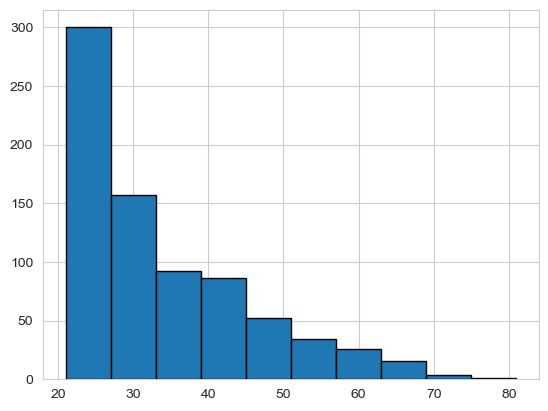

In [72]:
# The histogram of age variable was reached.
dataset['Age'].hist(edgecolor = 'black')

In [73]:
# The maximum and minimum age in the datset was extracted.
print('Max Age : ' + str(dataset['Age']. max())+ ','+ 'Min Age : ' + str(dataset['Age'].min()))

Max Age : 81,Min Age : 21


# 2. Distribution of Outcome variable

In [74]:
# Distribution of the outcome variable was examined and visualized.
dataset.Outcome.value_counts() # 500 dosent have diabetes(0) and 268 has diabetes(1)

0    500
1    268
Name: Outcome, dtype: int64

In [75]:
dataset.groupby('Outcome').agg({'Pregnancies' : 'mean'})

Pregnancies
Outcome             
0           3.298000
1           4.865672

In [76]:
dataset.groupby('Outcome').agg({'Age' : 'mean'})

Age
Outcome           
0        31.190000
1        37.067164

In [78]:
dataset.groupby('Outcome').agg({'Insulin' : 'max'})

Insulin
Outcome         
0            744
1            846

In [79]:
dataset.groupby('Outcome').agg({'Glucose' : 'max'})

Glucose
Outcome         
0            197
1            199

In [80]:
dataset.groupby('Outcome').agg({'BMI' : 'mean'})

BMI
Outcome           
0        30.304200
1        35.142537

In [81]:
# Distribution of Outcome variable was examined.
dataset['Outcome'].value_counts()*100/len(dataset)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

# 3. Countplot to see dataset is balanced or not

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


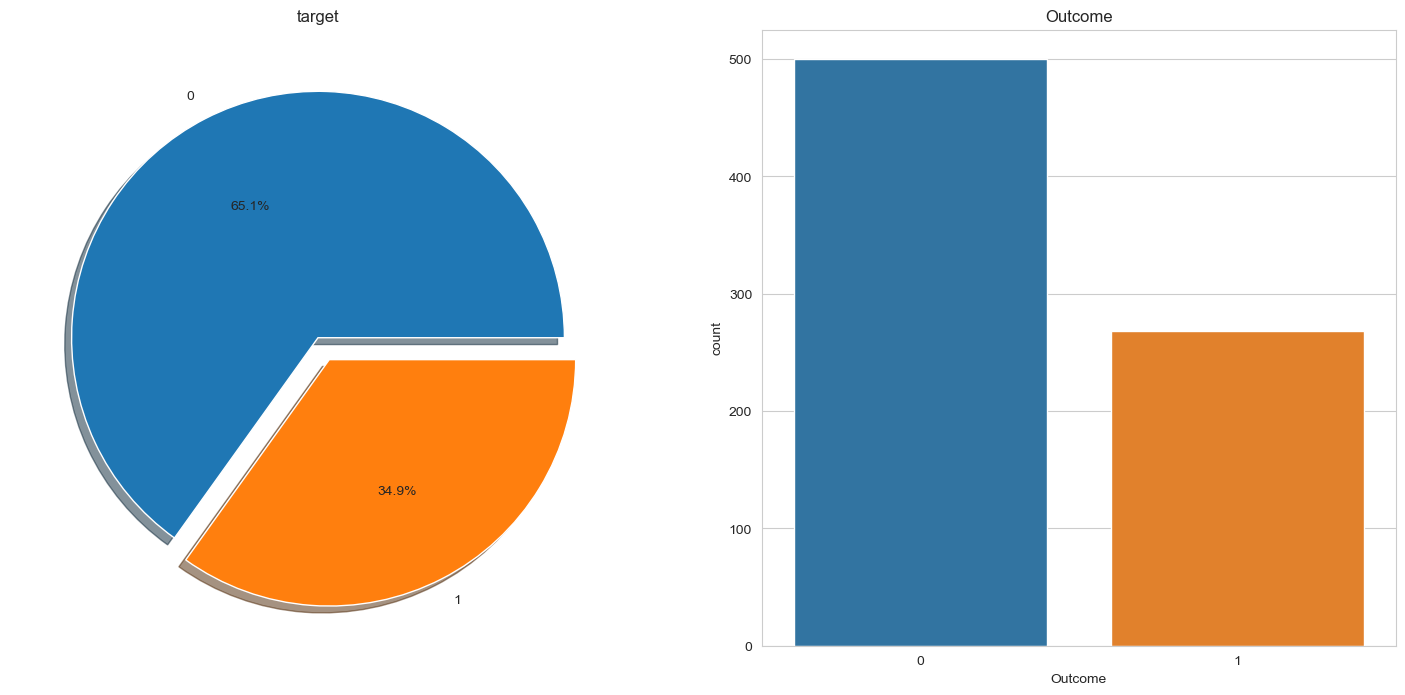

In [82]:
# Distribution of Outcome variable was visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=dataset,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

# CONCLUSION 
We observed that data is biased towards datapoints having otcome value as 0, it means that diabetes was not present actually. The number of non-diabetes is almost twice the number of diabetes patients, which means our dataset is imbalanced.

# 4. Histogram to see if data is normaly distributed or skewed

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='BMI', ylabel='Density'>

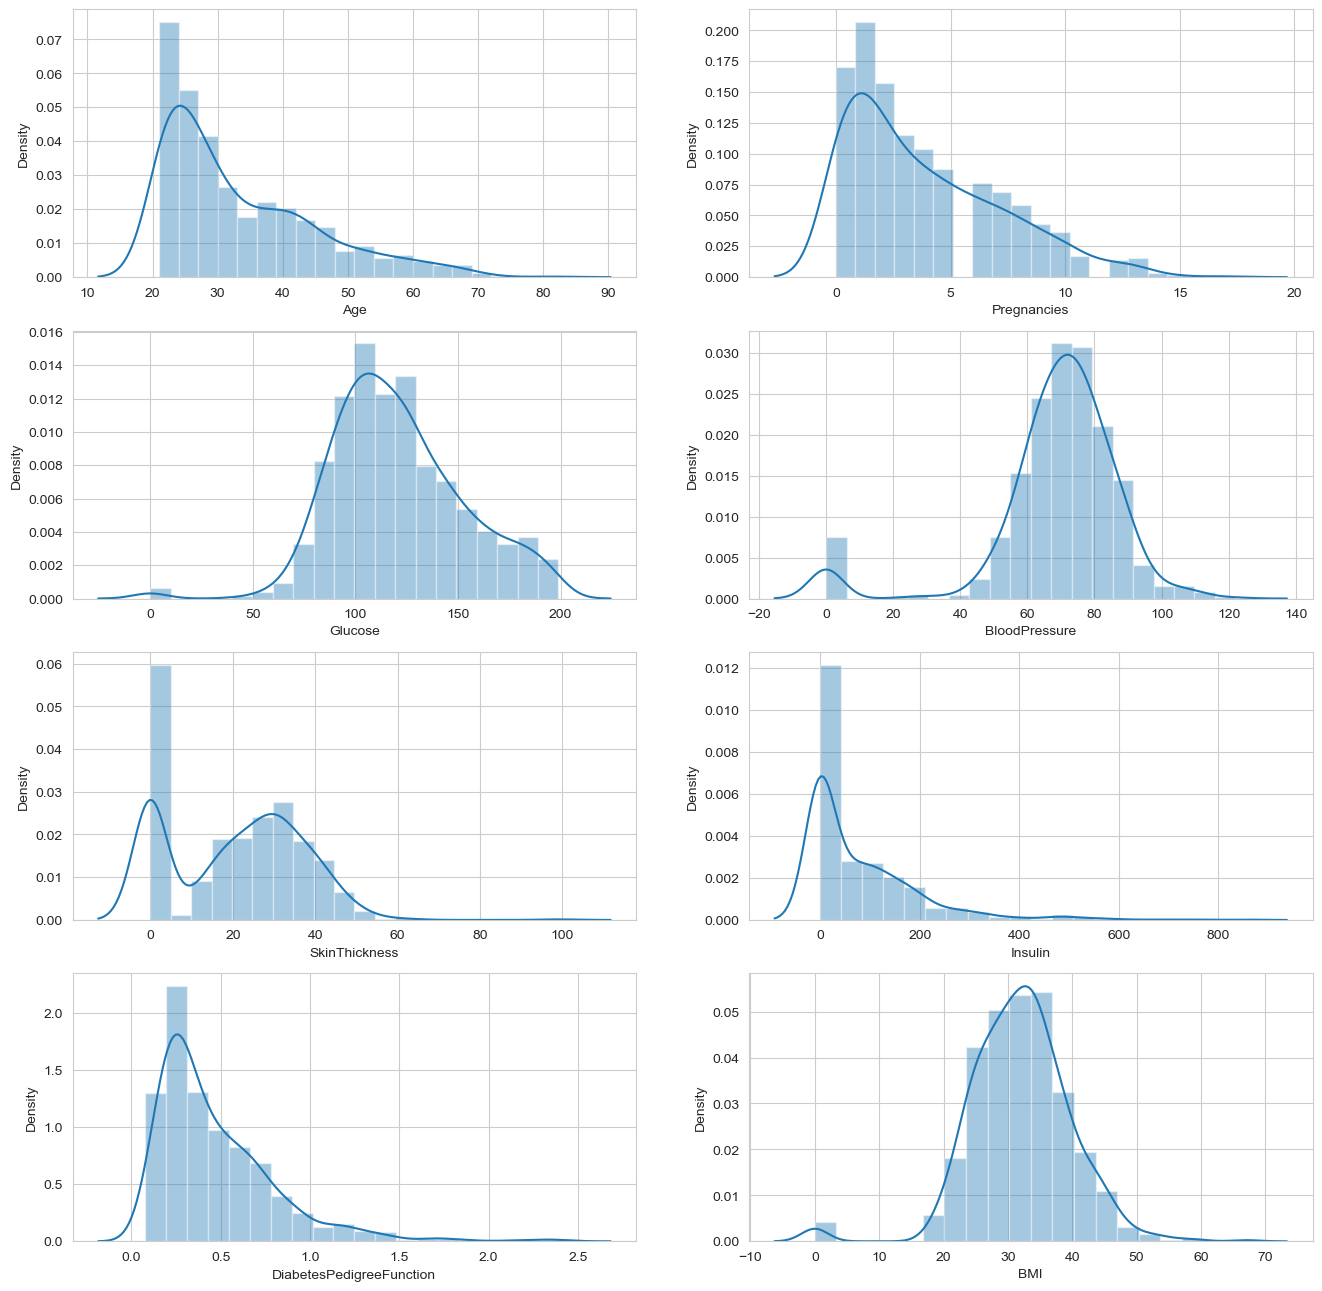

In [83]:
# Histogram and density graphs of each features was accessed
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dataset.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dataset.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset.BMI, bins = 20, ax=ax[3,1]) 

# Conclusion
We observed that only Glucose an BloodPressure are normally distributed, rest others are skewed and have outliers.

# Skewness

A left-skewed distribution has a long left tail. Left skewed distribution are also called negatively-skewed distributions. That's because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Left skewed distribution are also called positive-skewed distributions. That's because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

# 5. Boxplot to analyse the distribution and the outliers

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

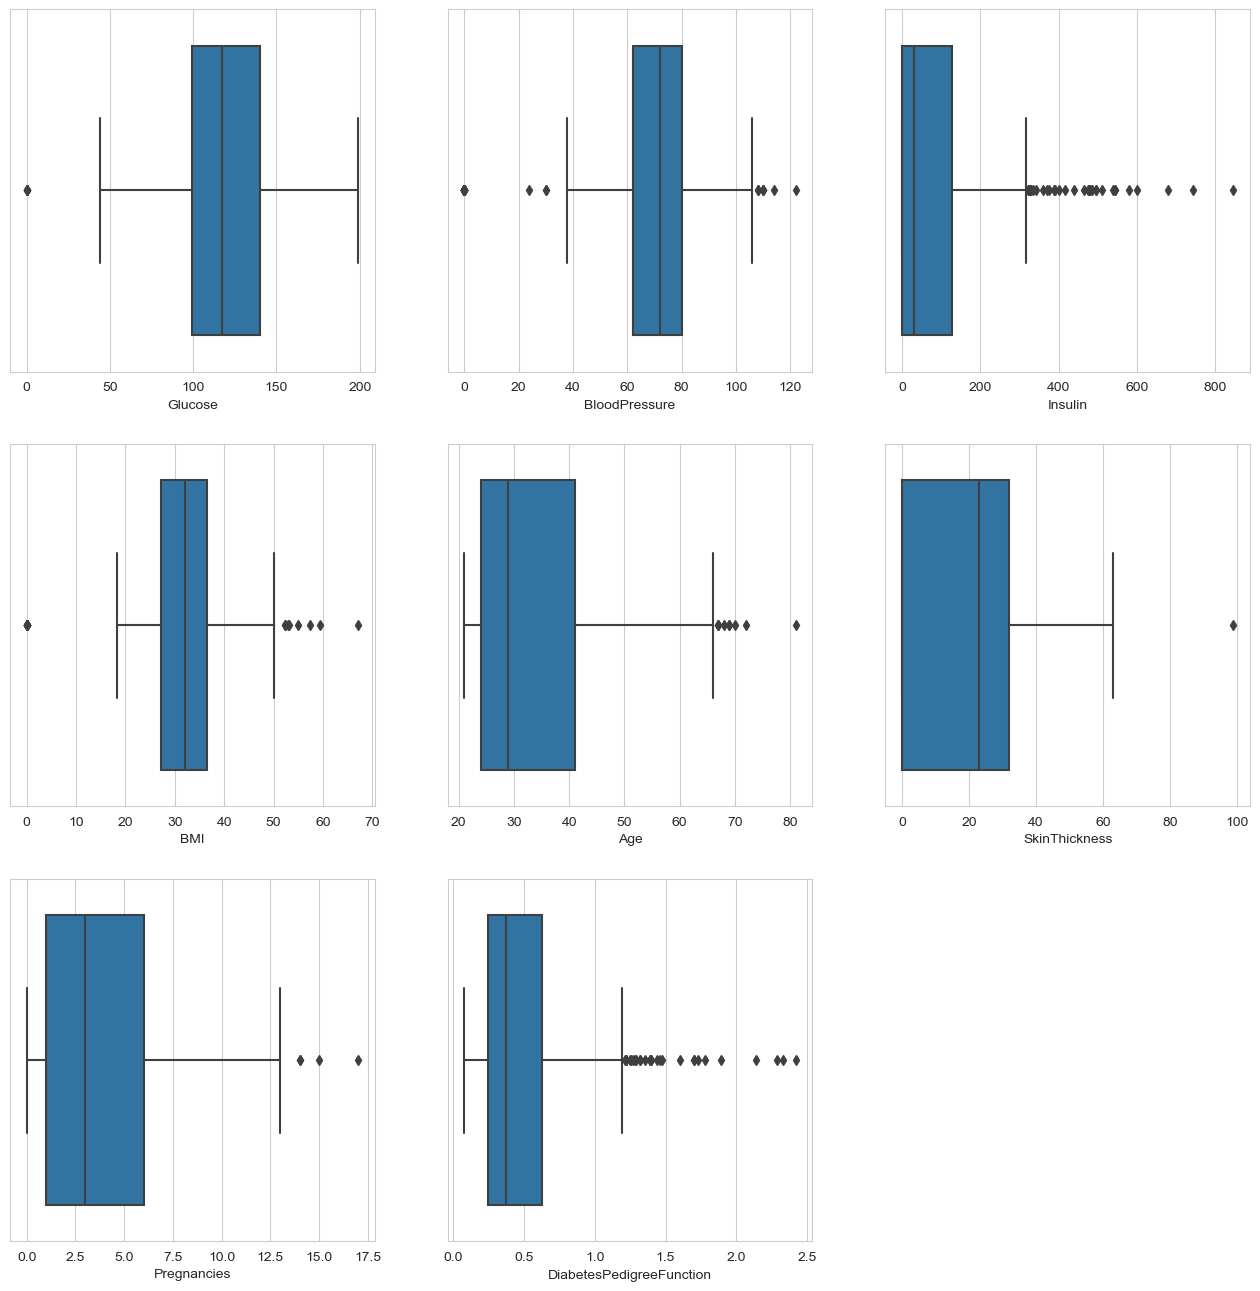

In [84]:
plt.figure(figsize = (16,16))
sns.set_style(style = 'whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x = 'Glucose', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'BloodPressure', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'Insulin', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'BMI', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'Age', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'SkinThickness', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'Pregnancies', data = dataset)
plt.subplot(3,3,8)
sns.boxplot(x = 'DiabetesPedigreeFunction', data = dataset)

# Outliers
Outliers are unusual values in the dataset, they can distort statistical analyses and violate their assumptions. Hence it is atmost important to deal with them. In this case removing outliers can cause data loss, so we have to deal with it using various scaling and tranformation techniques.

# 6. Scatterplot to understand the relationship between any two variables

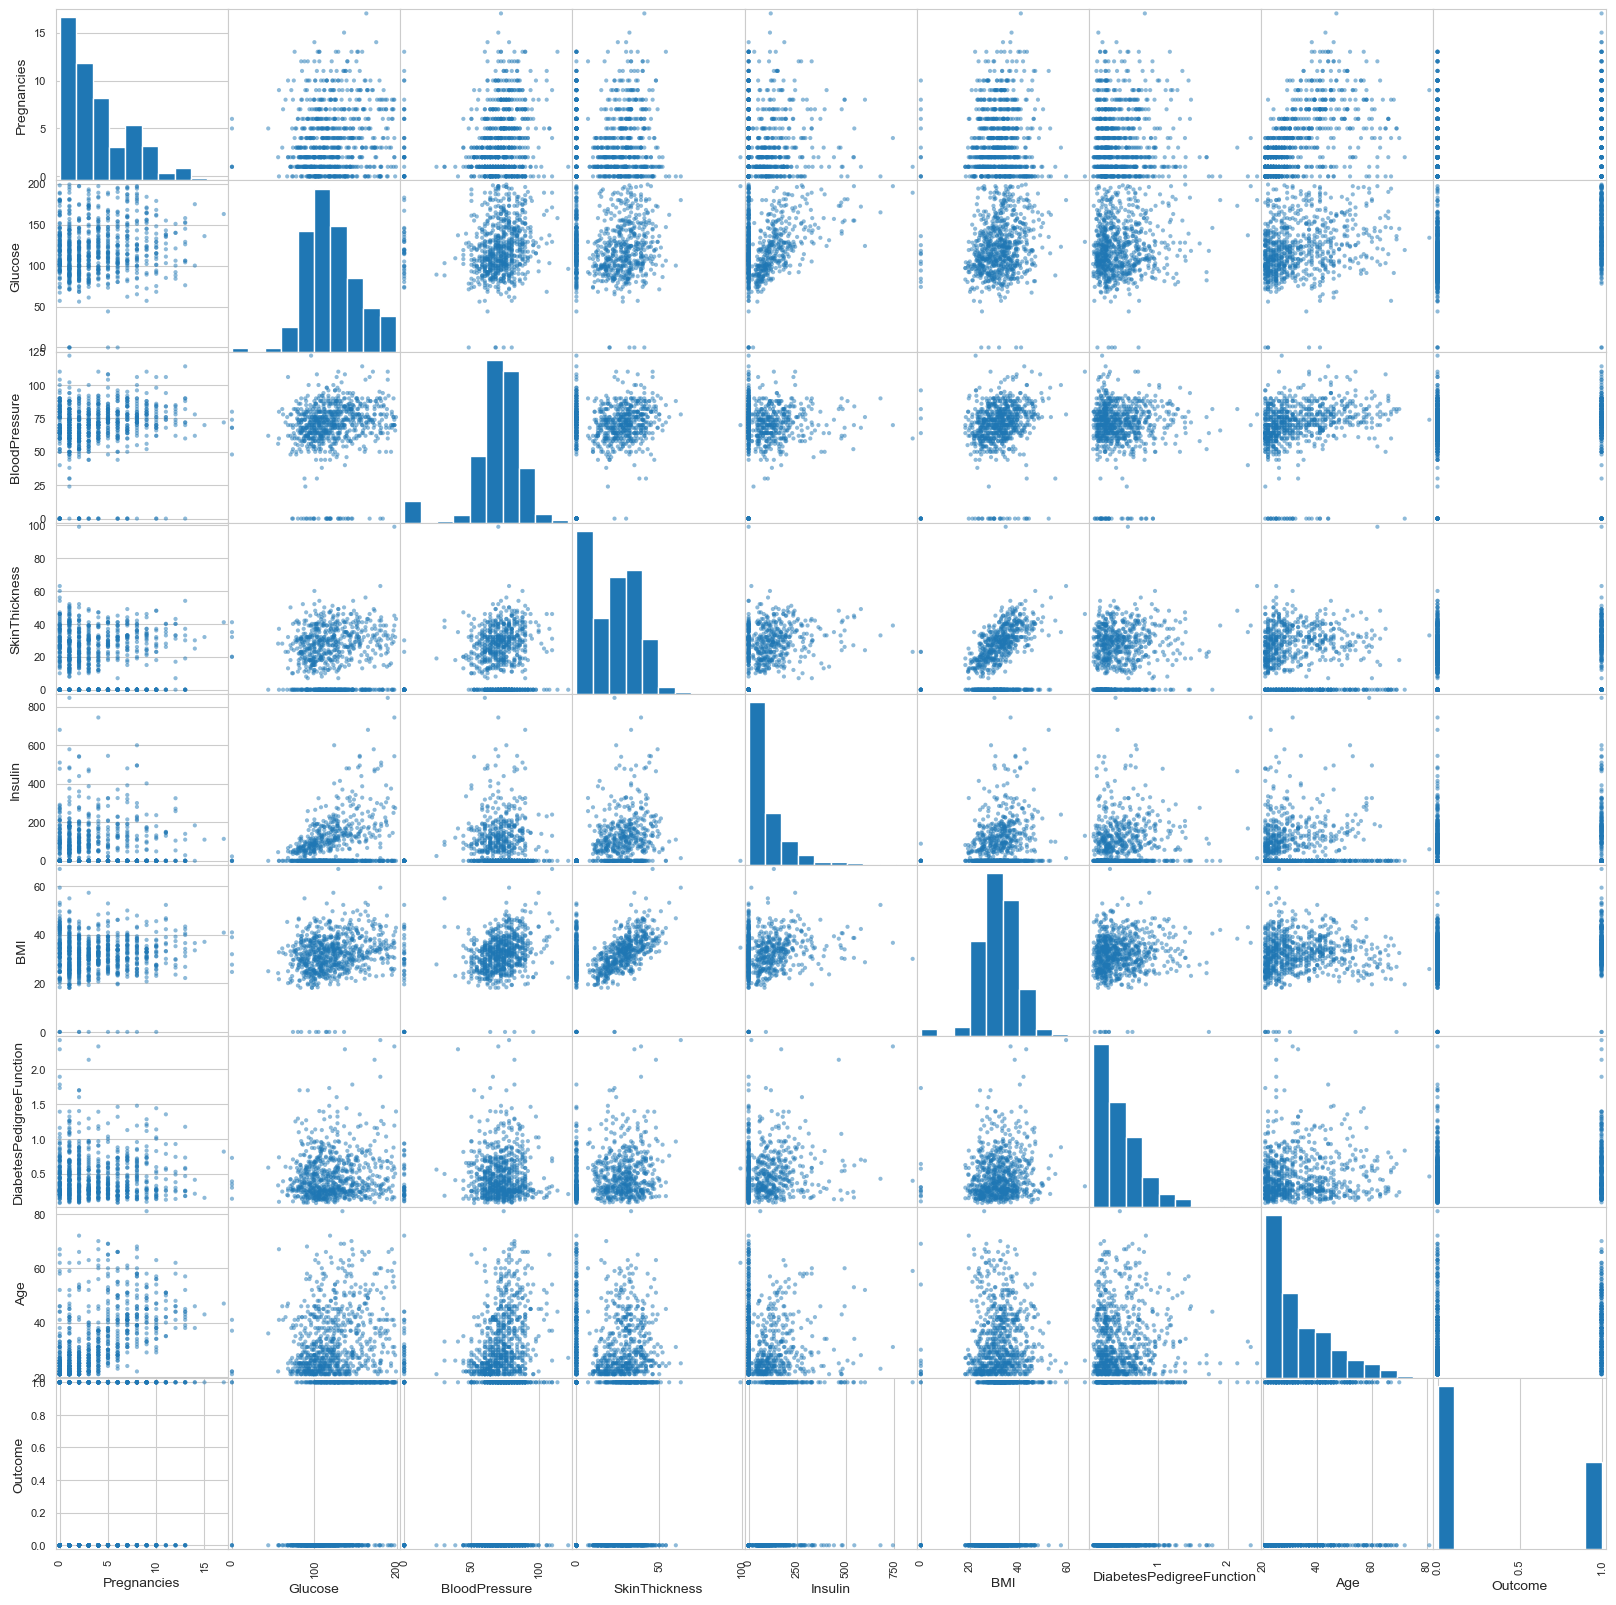

In [85]:
# Scatter matrix of uncleaned data
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,20));

# Conclusion
We come to various conclusion looking at these plots for example if we observe 5th plot in pregnancies with insulin can conclude that the women with higher pregnancies have lower insulin.

# Note :-
The pair plot build on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows to see the distribution of a single variable, while the scatter plots on the upper and lower triangles shows the realtionship between two variables.

# 7. Correlation matrix graph of the dataset

**Pearson's correlation coefficient :-**
Helps to find out the relationship between two quantities. It gives the measure of the strength of association between two variables. The value of Pearson's coefficient can be between -1 to +1.
- 1 means that they are highly correlated.
- 0 means no correlation.
- If the correlation value is > 0, there is a positive correlation. While the value of one variable increases the value of the other variable also increases.
- If the correlation is < 0, there is a negative correlation. While the value of one variable increases the value of the other variable decreases.

A heatmap is a two-dimensional representation of information with the help of colors. Heatmap can help the user visualize simple or complex information.

In [86]:
dataset.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<AxesSubplot:>

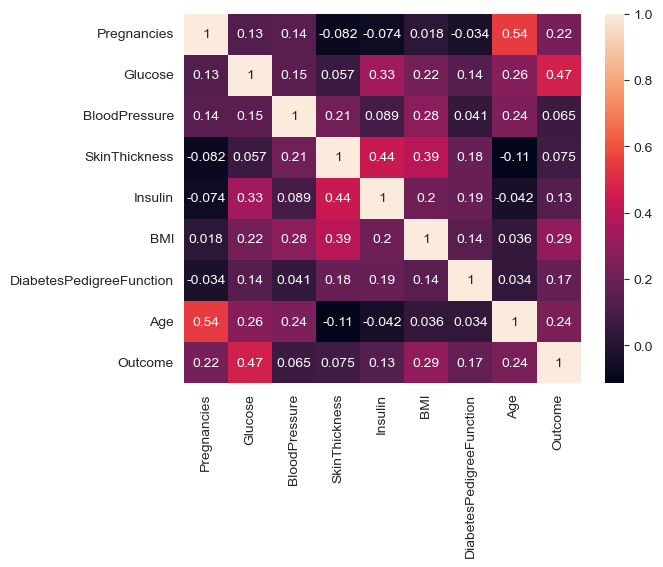

In [87]:
# Correlation matrix
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True)

# Conclusion
Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated.

# 5. Data Preprocessing

# 5.1 Missing observation analysis
We saw on dataset.head() that some features contain 0, it dosen't make sense here and this indicates missing values.
- Dropping duplicate value.
- Checking NULL values.
- Checking for 0 values and replace it :- it isn't medically possible for some data record to have 0 value such as BloodPressure or Glucose level. Hence we replace them with mean value for that particular column.

In [88]:
# Dropping duplicate values - checking if there is any duplicate rows and dropping if any.
dataset = dataset.drop_duplicates()

In [89]:
# check for missing values, count them and print the sum for every column.
dataset.isnull().sum() # Conclusion : there is no null values in this dataset.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [90]:
# Checking for 0 values in 5 columns, Age & DiabetesPedigreeFunction do not have minimum 0 value so no need to replace, also number of pregnancies as 0 is possible as observed in dataset.describe.
print(dataset[dataset['BloodPressure'] == 0].shape[0])
print(dataset[dataset['Glucose'] == 0].shape[0])
print(dataset[dataset['SkinThickness'] == 0].shape[0])
print(dataset[dataset['Insulin'] == 0].shape[0])
print(dataset[dataset['BMI'] == 0].shape[0])

35
5
227
374
11


In [91]:
# Have been visualizing using the missingno library for the visualizaion of missing observations.
# Plotting
import missingno as msno
msno.bar(dataset);

ModuleNotFoundError: No module named 'missingno'

# 5.2 Data Cleaning

Some of the columns have a skewed distribution, so the mean is more affected by outliers than median. Glucose and BloodPressure have normal distribution hence we replace 0 values in those columns by mean value. SkinThickness, Insulin BMI have skewed distributions hence median is better choice as it is less affected by outliers.

In [92]:
# Replacing 0 values with median of that column.
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].mean()) # normal distribution
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].mean()) # normal distribution
dataset['SkinThickness']=dataset['SkinThickness'].replace(0,dataset['SkinThickness'].median()) # skewed distribution
dataset['Insulin']=dataset['Insulin'].replace(0,dataset['Insulin'].median()) # skewed distribution
dataset['BMI']=dataset['BMI'].replace(0,dataset['BMI'].median()) # skewed distribution

In [93]:
msno.bar(dataset);

NameError: name 'msno' is not defined

# 5.3 Visualization of cleaned data

1. Plotting after NaN removel
2. Pair plot for clean data
3. Heatmap for clean data

# 1. Plotting after NaN removal

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

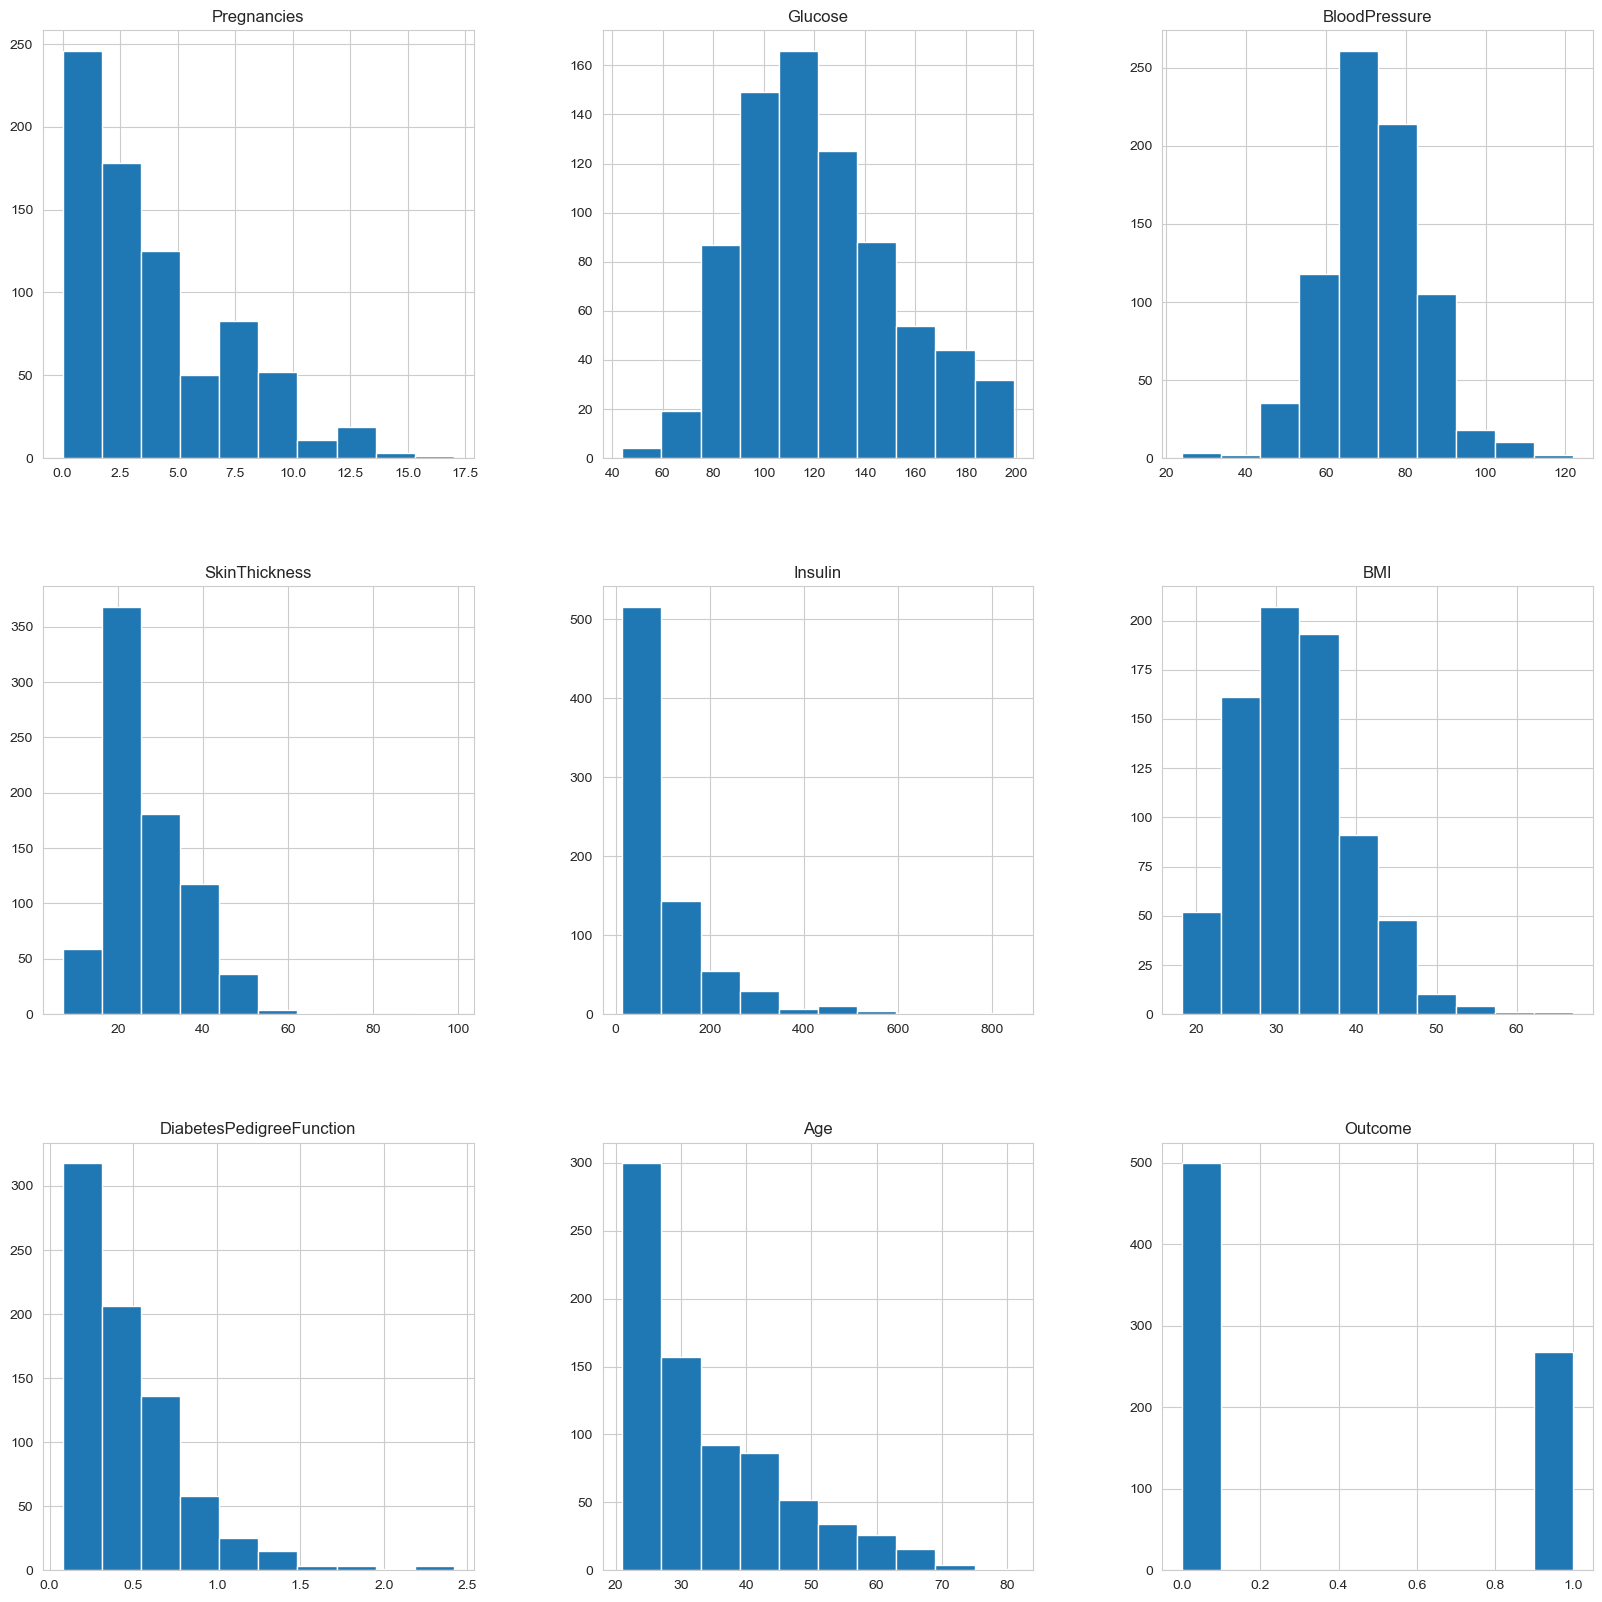

In [94]:
dataset.hist(figsize = (20,20))

# 2. Pair plot for clean data

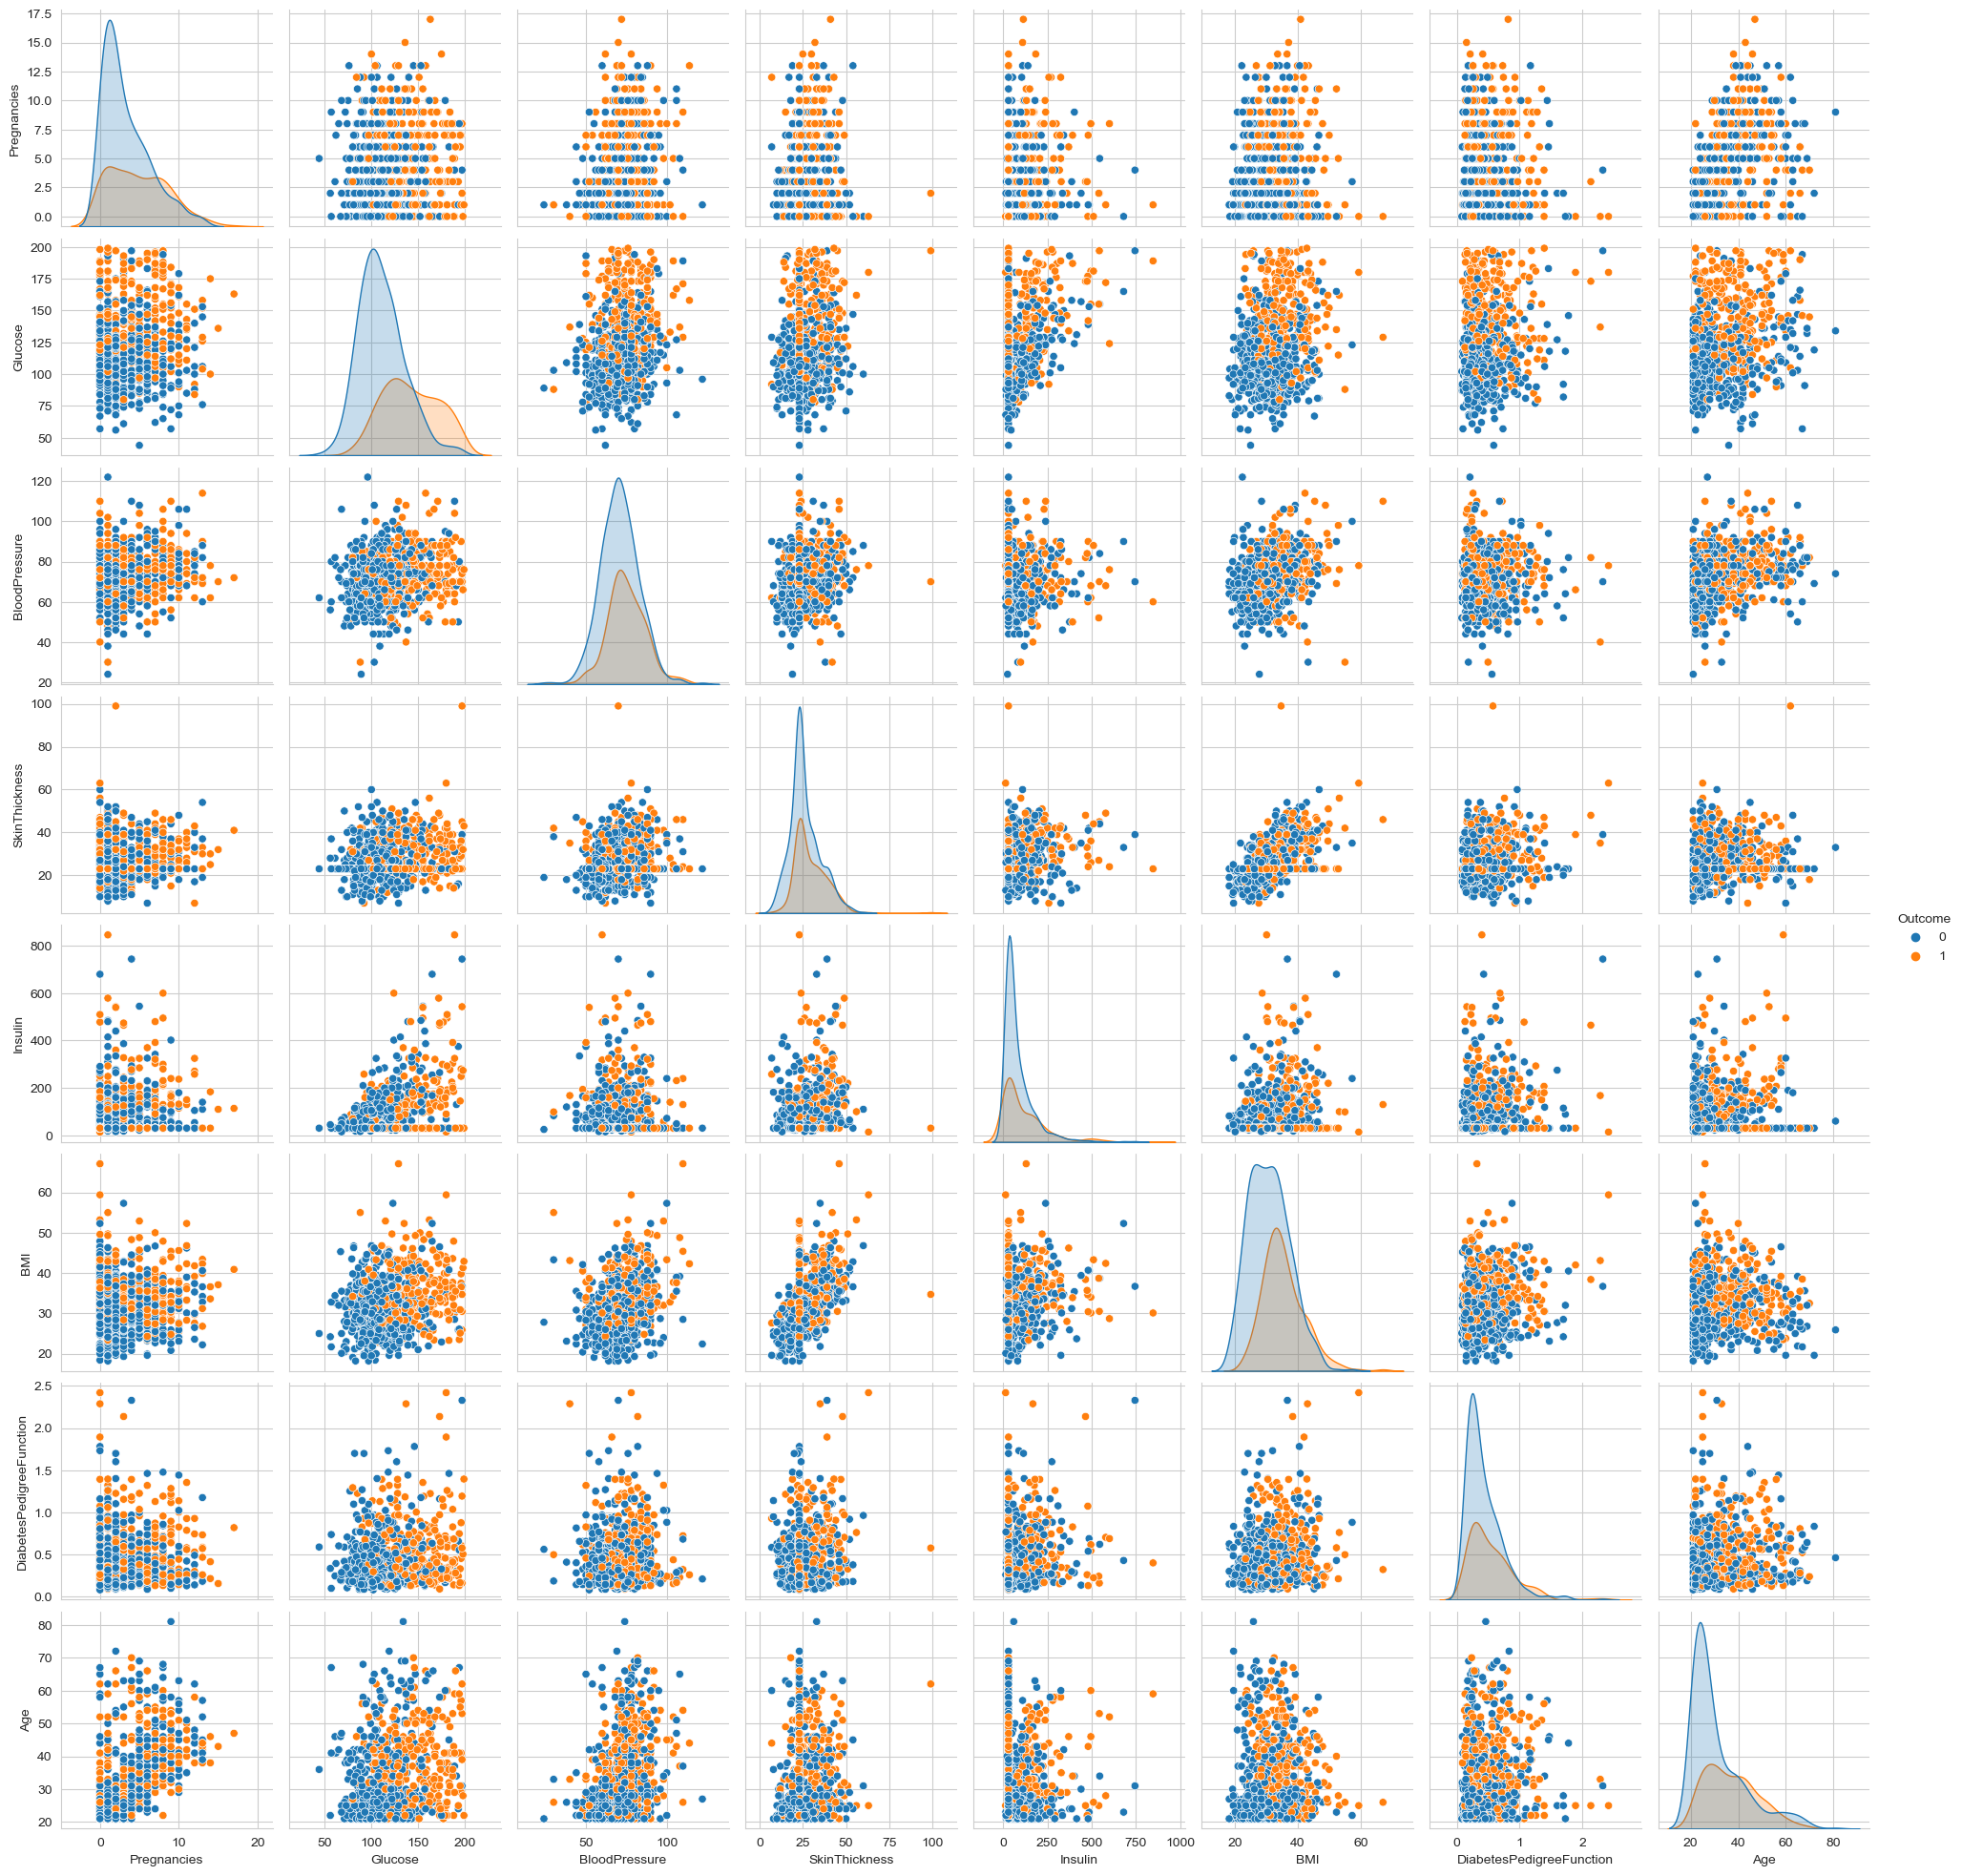

In [95]:
sns.pairplot(dataset, hue = 'Outcome')

# 3. Heatmap for clean data

<AxesSubplot:>

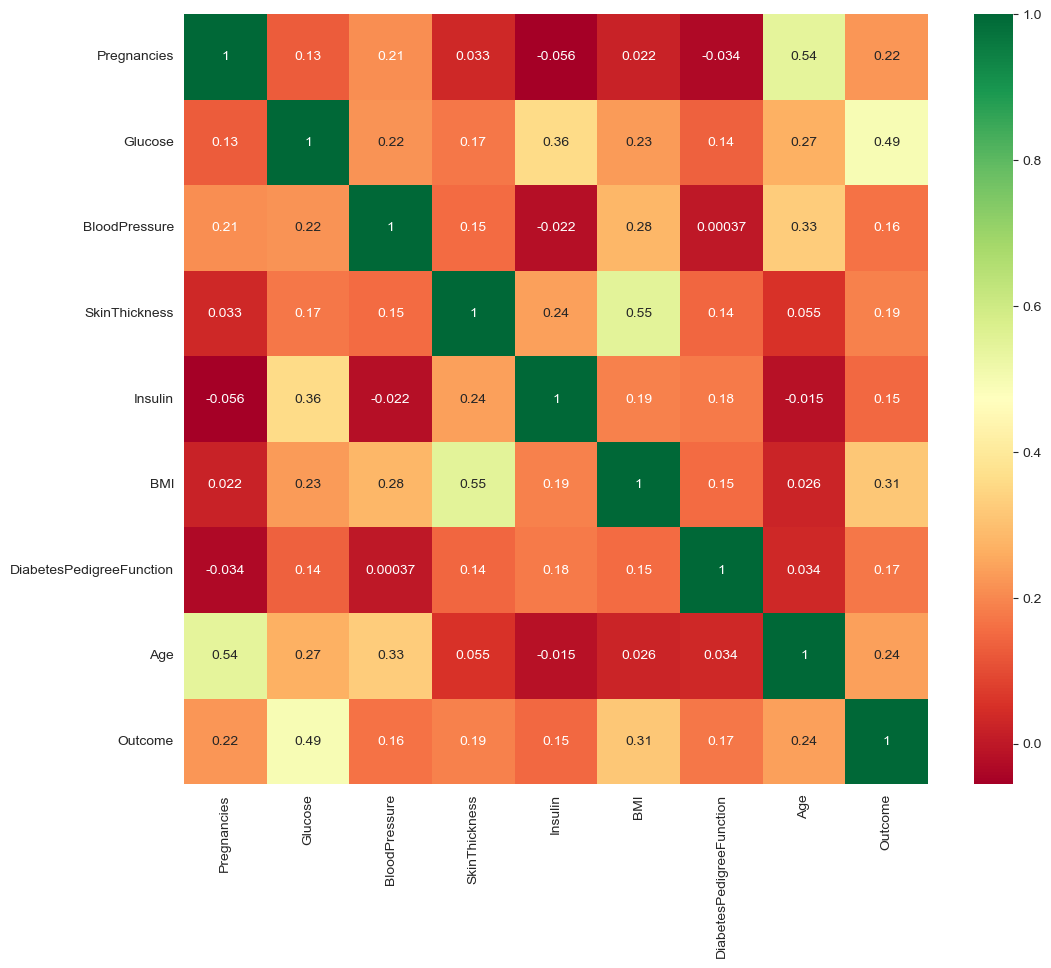

In [96]:
plt.figure(figsize = (12,10))
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')

# 6. Outlier observation analysis

**1. What is Outlier ?**
- An outlier is a data point in a dataset that is distant from all other observations.

**2. How can we identify an outlier ?**
- Using boxplot
- Using scatter plot
- Using Zscore

**3. How to treat the outlier?**
- Standard Deviation :- it is a number that describes how spread out the values are. Low deviation means that most of the    numbers are close to the mean value. A high standard deviation means that the values are spred out over a wide range.    Standard deviation can be used to find the outliers in the dataset. If a value of a certain number of standard deviation away from the mean, that data point is identifued as an outlier.
    

In [97]:
# scaling the data
# Extracting dependent and independent variables.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# Extracting independent variable(X)
X =  pd.DataFrame(sc_X.fit_transform(dataset.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [98]:
X.head()  # looking at the transformed data

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865276      -0.021044       0.831114 -0.608201  0.167240   
1    -0.844885 -1.205989      -0.516583       0.180566 -0.608201 -0.851551   
2     1.233880  2.015979      -0.681762      -0.469981 -0.608201 -1.331838   
3    -0.844885 -1.074480      -0.516583      -0.469981 -0.006185 -0.633239   
4    -1.141852  0.503626      -2.663916       0.831114  0.695378  1.549885   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [99]:
# Extracting dependent variable(y)
y = dataset.Outcome

In [100]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 7. Train Test split

- The train-test split is a technique for evaluatin the performance of a machine learning algorithm.
- Train Dataset : Used to fit the machine learning model.
- Test Dataset : Used to evaluate the fit machine learning model.
- Common split percentage include :
  Train : 80%, Test : 20%
  Train : 67%, Test : 33%
  Train : 50%, Test : 50%

Here we used 80% train and 20% test.

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [102]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [103]:
X_test.shape,y_test.shape

((154, 8), (154,))

# 8. Classification Algorithms
- KNN
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

The models include the following :-

a. Hyperparameter Tuning using GridSearch CV

**1. What is Hyperparameter tuning ?**
- Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier.

   Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning   models.

**2. What is GridSearch ?**
- Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

**3. What steps to follow for the Hyperparameter tuning ?**
- Select the type of model we want to use like RandomForestClassifier, regressor or any other model
- Check what are the parameters of the model
- Select the methods for searching the hyperparameter
- Select the cross-validation approach
- Evaluate the model using the score

b. Fit Best Model

c. Predict on testing data using that model

d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score

**Confusion Matrix**
It is a tabular visualization of the model predictions versus the ground-truth labels.

**F1 Score :-**
It’s the harmonic mean between precision and recall. 

**Precision Score**
Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.

**Recall Score**
It is the fraction of positives/negative events that you predicted correctly. 

Here we given preference to F1 Scoring because :- 

1. When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

2. F1-score is a better metric when there are imbalanced classes as in the above case.

3. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall.

# How to save and load ML models

**WHAT**

On various instances, while working on developing a Machine Learning Model, we'll need to save our prediction models to file, and then restore them in order to reuse our previous work to.


**WHY**

We need to save and restore/reload later our ML Model , so as to -

a) test our model on/with new data, 

b) compare multiple models, 

c) or anything else. 

**object serialization**

This process / procedure of saving a ML Model is also known as object serialization - representing an object with a stream of bytes, in order to store it on disk, send it over a network or save to a database.

**deserialization**

While the restoring/reloading of ML Model procedure is known as deserialization. 

We will be covering following 3 approaches of Saving and Reloading a ML Model -

1) Pickle Approach

2) Joblib Approach

3) Manual Save and Restore to JSON approach

**Here we use Joblib Approach**

# 8.1 K - Nearest Neighbours (KNN) 

KNN algorithm assumes the similarity between the new case/data and put the new case into the category that is most similar to the available categories.

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [124]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [125]:
knn_model = grid_search.fit(X_train,y_train)

In [126]:
#Best Hyperparameters Value
print('Best leaf_size:', knn_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 24


In [127]:
#Predict testing set
knn_pred = knn_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154


 F1:
 0.6666666666666666

 Precision score is:
 0.725

 Recall score is:
 0.6170212765957447

 Confusion Matrix:



<AxesSubplot:>

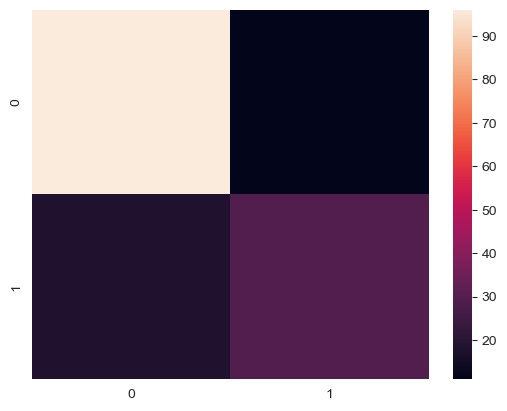

In [128]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [129]:
# Import Joblib Module from Scikit Learn
import joblib

# Save RL_Model to file in the current working directory
joblib_file = "joblib_knn_Model.pkl"  
joblib.dump(knn_model, joblib_file)

['joblib_knn_Model.pkl']

# 8.2 Naive Bayes 

Naive Bayes algorithm is an supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object

In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {'var_smoothing': np.logspace(0,-2, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [131]:
nb_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [132]:
nb_pred = nb_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.72      0.49      0.58        47

    accuracy                           0.79       154
   macro avg       0.76      0.70      0.72       154
weighted avg       0.78      0.79      0.77       154


 F1:
 0.5822784810126582

 Precision score is:
 0.71875

 Recall score is:
 0.48936170212765956

 Confusion Matrix:



<AxesSubplot:>

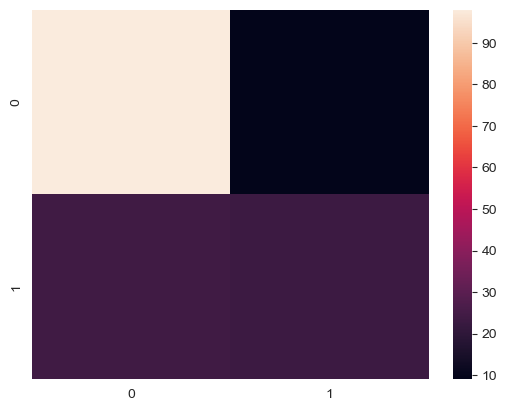

In [133]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

In [134]:
# Import Joblib Module from Scikit Learn
import joblib

# Save RL_Model to file in the current working directory
joblib_file = "joblib_nb_Model.pkl"  
joblib.dump(nb_model, joblib_file)

['joblib_nb_Model.pkl']

# 8.3 Support vector machine (SNM)

SVM is one of the most popular supervised learning algorithms, which is used for **Classsification** problems in machine learning. The goal of SVM is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the feature (have diabetes or don't have diabetes). This best boundary is called a **Hyprerplane**. SVM chooses the extreme points/vectors that help in creating the hyperplane. These cases are called support vectors, and hence it is termed as **Support Vector Machine (SVM)** 


In [135]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [136]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [137]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [121]:
svm_model = grid_search.fit(X, y)

In [138]:
svm_pred = svm_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.611764705882353

 Precision score is:
 0.6842105263157895

 Recall score is:
 0.5531914893617021

 Confusion Matrix:



<AxesSubplot:>

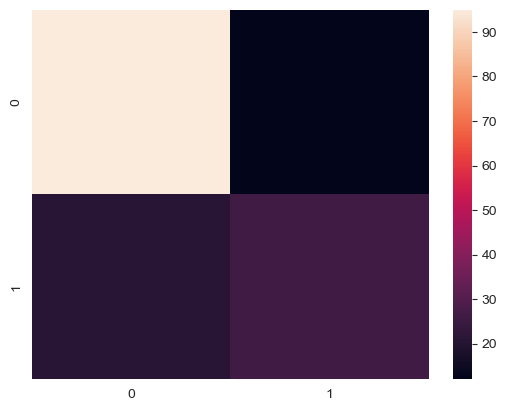

In [140]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,svm_pred))
print("\n Precision score is:\n",precision_score(y_test,svm_pred))
print("\n Recall score is:\n",recall_score(y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [141]:
# Import Joblib Module from Scikit Learn
import joblib

# Save RL_Model to file in the current working directory
joblib_file = "joblib_svm_Model.pkl"  
joblib.dump(svm_model, joblib_file)

['joblib_svm_Model.pkl']

# 8.4 Decision Tree

It is a supervised learning technique that can be used for **Classification** problems. It is called a **Decision Tree** because similar to a tree, it starts with the root node, which expands on further branches and construct a tree-like structure. Decision tree can contain categorical data (Yes/No) as well as numeric data.

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [164]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [165]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [166]:
dt_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [167]:
dt_pred=dt_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       107
           1       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<AxesSubplot:>

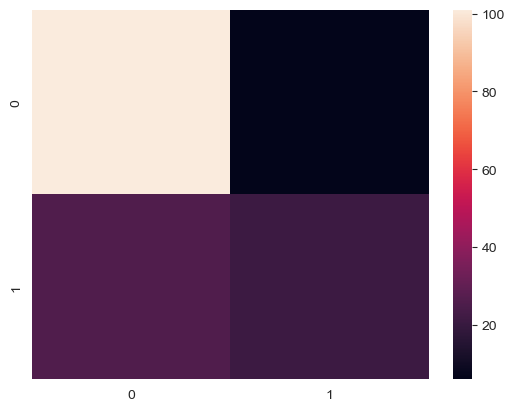

In [168]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

In [169]:
# Import Joblib Module from Scikit Learn
import joblib

# Save RL_Model to file in the current working directory
joblib_file = "joblib_dt_Model.pkl"  
joblib.dump(dt_model, joblib_file)

['joblib_dt_Model.pkl']

# 8.5 Random Forest 
Random Forest belongs to the supervised learning technique. It is used for Classification problems in machine learning. Random Forest is a classifier that contains a number of Decision Tree on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on Decision Tree, the Random Forest takes the prediction from each tree and based on the majority votes of predictions and it predicts the final output. 

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [171]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [172]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [173]:
rf_model = grid_search.fit(X_train, y_train)

In [174]:
rf_pred=rf_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.6666666666666666

 Precision score is:
 0.717391304347826

 Recall score is:
 0.7021276595744681

 Confusion Matrix:



<AxesSubplot:>

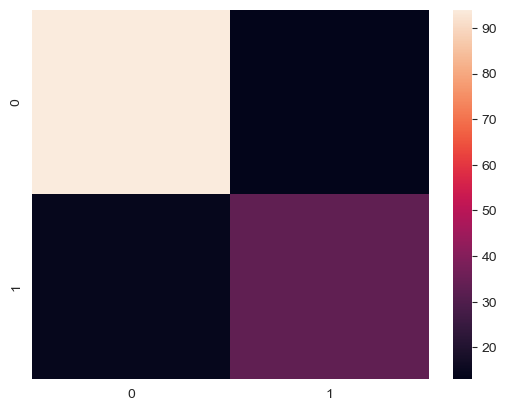

In [175]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,rf_pred))
print("\n Recall score is:\n",recall_score(y_test,rf_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

In [158]:
# Import Joblib Module from Scikit Learn
import joblib

# Save RL_Model to file in the current working directory
joblib_file = "joblib_rf_Model.pkl"  
joblib.dump(rf_model, joblib_file)

['joblib_rf_Model.pkl']

# 8.6 Logistic Regression

Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no". Logistic Regression uses the concept of predictive modelling as regression, therefore it is called **Logistic Regression**, but it is used to calssify samples. Therefore, it falls under the Classification algorithms

Logistic regression does not really have any critical hyperparameters to tune. Somet
didn't apply grid search for Logistic Regression. 

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [177]:
reg = LogisticRegression()
lr_model = reg.fit(X_train,y_train)  

In [178]:
lr_pred = lr_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154


 F1:
 0.6666666666666666

 Precision score is:
 0.7567567567567568

 Recall score is:
 0.5957446808510638

 Confusion Matrix:



<AxesSubplot:>

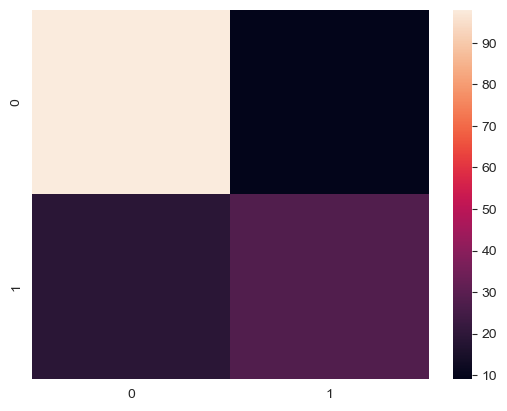

In [180]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [182]:
# Import Joblib Module from Scikit Learn
import joblib

# Save RL_Model to file in the current working directory
joblib_file = "joblib_lr_Model.pkl"  
joblib.dump(lr_model, joblib_file)

['joblib_lr_Model.pkl']

# 9. Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values.Dropping duplicate value.Checking NULL values.Checking for 0 values and replace it.  

3) Data Preprocessing section;
Some of the columns have a skewed distribution, so the mean is more affected by outliers than median. Glucose and BloodPressure have normal distribution hence we replace 0 values in those columns by mean value. SkinThickness, Insulin BMI have skewed distributions hence median is better choice as it is less affected by outliers.

4) During Model Building;
Logistic Regression, KNN, SVM, Random Forests, Decision Tree, Naive Bayes Classifier algorithms are used and hyperparameters are used to evaluate optimal parameters of the model. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall.  

5) Result
Logistic Regression, KNN, SVM, Random Forest, Decision Tree, Naive Bayes, classification machine learning models were used to predict the diabetes using medical details about their bodies. 